Please **submit this Jupyter notebook through Canvas** no later than **Monday November 12, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

In [1]:
import sys
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from matplotlib import rc
# rc('text', usetex=True)
# plt.rc('text', usetex=True)

In [2]:
sys.float_info.epsilon

2.220446049250313e-16

-----
# Exercise 1

## (a)
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

Singular matrix $\Rightarrow$ det(A) = 0. Therefore, solving for det(A) = 0,

$ 1(-3 - \alpha) + (-3 - 0) + \alpha(2\alpha - 0) = 0 $

$ 2\alpha^2 - \alpha -6 = 0 $

$ 2\alpha(\alpha-2) + 3(\alpha-2) = 0 $

$ \Rightarrow \alpha = 2, \frac{-3}{2} $

---

## (b)
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

Representing the given set of equations as matrix A, we have $A = \begin{bmatrix} 2 & 1 & 1 \\ 2 & -1 & 3 \\ -2 & \alpha & 3 \end{bmatrix}$ and $b = \begin{bmatrix} 3 \\ 5 \\ 1 \end{bmatrix}$

Singular matrices are invertible and have an infinite number of solutions. Moreover, singular matrices have a large condition number.

$\therefore \text{det}(A) = 0 \Rightarrow 2(-3 - 3\alpha) - 1(6 + 6) + 1(2\alpha - 2) = 0 $

$ -20 - 4\alpha = 0 $

$ \alpha = -5 $

$ \therefore A =  \begin{bmatrix} 2 & 1 & 1 \\ 2 & -1 & 3 \\ -2 & \textbf{-5} & 3 \end{bmatrix}$

In [3]:
A = np.matrix([[2, 1, 1], [2, -1, 3], [-2, -5, 3]])
b = np.matrix([[3], [5], [1]])

In [4]:
np.linalg.cond(A, p = 1)

inf

In [5]:
# checking if the matrix is invertible or not. 
# If a matrix is not invertible, then there are zero or infinite solutions
try:
    np.linalg.solve(A, b) # singular matrices don't have a unique solution. so this throws an error
    np.linalg.inv(A) # singular matrices don't have an inverse. therefore, this also results in an error
except:
    print("LinAlgError: Singular Matrix")

LinAlgError: Singular Matrix


## (c)
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a)
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [6]:
A = np.matrix([[2, 4, -2], [4, 9, -3], [-2, -1, 7]])
b = np.matrix([[2], [8], [10]])

In [7]:
def lu_inv(A):
    # inverse can be computed only for square matrices
    assert A.shape[0] == A.shape[1], "Input is not a square matrix"
    
    # calculate n, l, u for A
    # L matrix undergoes permutation to enforce larger pivots which produce smaller multipliers and hence smaller errors
    n = A.shape[0]    
    L, U = la.lu(A, permute_l = True)
    A_inv, d, temp = np.eye(n, dtype = float), np.eye(n, dtype = float), np.eye(n, dtype = float)
    
    for i in range(n):
        # solve the lower tri sys by fwd substitution
        d[:, i] = la.solve(L, temp[:, i])

        # solve the upper tri sys by bkwd substitution 
        A_inv[:, i] = la.solve(U, d[:, i])
        
    return (A_inv)

## (b)
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?

## (c)
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

In [8]:
N = 12
temp = np.zeros((N,1))

In [9]:
def hilbert_compare(n):
    
    H = la.hilbert(n)
    H_inv_true = la.invhilbert(n)
    H_inv = lu_inv(H)
    
    inf_norm = np.linalg.norm(H_inv, np.inf, keepdims= True)
    inf_norm_true = np.linalg.norm(H_inv_true, np.inf, keepdims= True)
    
    return H_inv, H_inv_true

In [10]:
t = np.arange(1, N+1, 1)
vals = [hilbert_compare(n) for n in t]
vals = np.array(vals)

/home/tharangni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.916007e-17
  app.launch_new_instance()


In [11]:
vals[1][0] - vals[1][1]

array([[ 8.88178420e-16, -1.77635684e-15],
       [-1.77635684e-15,  3.55271368e-15]])

In [12]:
for i in range(N):
    temp[i] = np.linalg.norm(vals[i][0] - vals[i][1], np.inf)

Text(0,0.5,'||H_inv - H_inv_true||_inf')

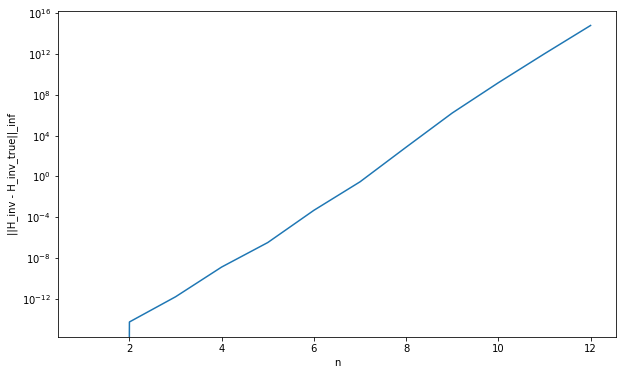

In [13]:
plt.figure(figsize = (10, 6))
plt.semilogy(t, temp)
plt.xlabel("n")
plt.ylabel('||H_inv - H_inv_true||_inf')

## (d)
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.